<a href="https://colab.research.google.com/github/Vernombre/LunderGroundJourneys/blob/main/London_Underground_Journeys_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Data

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [35]:
path=r'https://raw.githubusercontent.com/Vernombre/LunderGroundJourneys/main/Data/tfl-journeys-type.csv'
df = pd.read_csv(path, index_col = 'Period beginning', parse_dates=['Period beginning'], dayfirst=True)
df['PPD']=df['Underground journeys (m)']/df['Days in period']
df.head()

,Period and Financial year,Reporting Period,Days in period,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m),PPD
Period beginning,,,,,,,,,,,,
2010-04-01,01_10/11,1,31,01-May-10,189.1,90.5,6.3,2.3,NaN,NaN,NaN,2.919355
2010-05-02,02_10/11,2,28,29-May-10,181.6,84.5,5.8,2.2,NaN,NaN,NaN,3.017857
2010-05-30,03_10/11,3,28,26-Jun-10,175.9,84.3,5.8,2.1,NaN,NaN,NaN,3.010714
2010-06-27,04_10/11,4,28,24-Jul-10,183.4,86.5,6.1,2.1,NaN,NaN,NaN,3.089286
2010-07-25,05_10/11,5,28,21-Aug-10,160.4,82.9,5.8,2.0,NaN,NaN,NaN,2.960714


In [36]:
df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,10]], axis = 1, inplace = True)
df.index.names = ['Date']
df.head()

,PPD
Date,
2010-04-01,2.919355
2010-05-02,3.017857
2010-05-30,3.010714
2010-06-27,3.089286
2010-07-25,2.960714


In [37]:
df_D = df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
df_D.index.names =['date']
df_D.head()

,PPD
date,
2010-04-01,2.919355
2010-04-02,NaN
2010-04-03,NaN
2010-04-04,NaN
2010-04-05,NaN


In [64]:
df_D=df_D.interpolate(method='linear')

In [65]:
df_M = df_D.resample('MS').mean()
df_M.head()

,PPD
date,
2010-04-01,2.965428
2010-05-01,3.014274
2010-06-01,3.055536
2010-07-01,3.003423
2010-08-01,2.922737


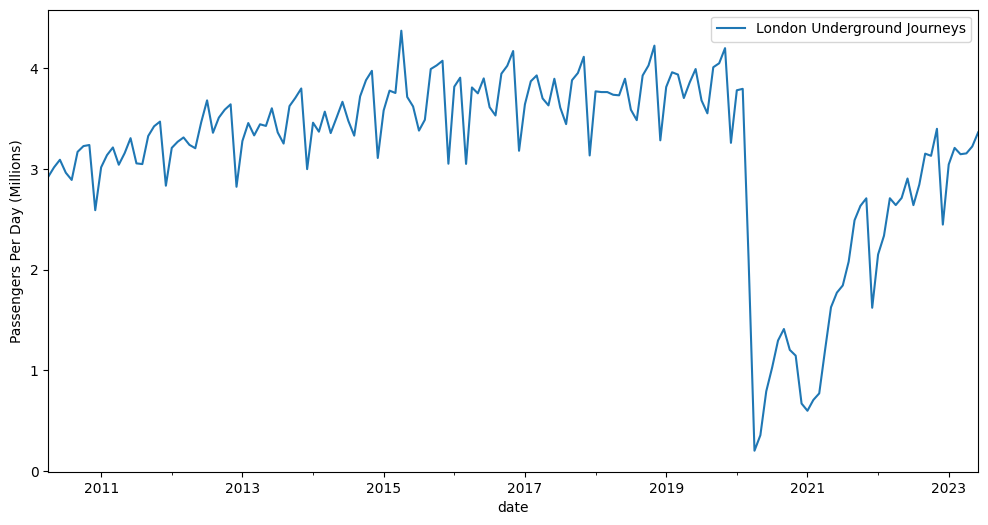

In [7]:

df_M['PPD'].plot(figsize=(12,6),label='London Underground Journeys')
plt.ylabel('Passengers Per Day (Millions)')
plt.legend();

In [8]:
df_M.head()

,PPD
date,
2010-04-01,2.919355
2010-05-01,3.014286
2010-06-01,3.089286
2010-07-01,2.960714
2010-08-01,2.889286


EDA

Stationarity

In [9]:
from statsmodels.tsa.stattools import adfuller

resultADF = adfuller(df_M)
print('ADF Statistic: %f' % resultADF[0])
print('p-value: %f' % resultADF[1])
print('Critical Values:')
for key, value in resultADF[4].items():
	print( (key, value))

ADF Statistic: -2.321298
p-value: 0.165191
Critical Values:
('1%', -3.476273058920005)
('5%', -2.881687616548444)
('10%', -2.5775132580261593)


In [10]:
df_diff_M = df_M.diff()
df_diff_M = df_diff_M.iloc[1:]

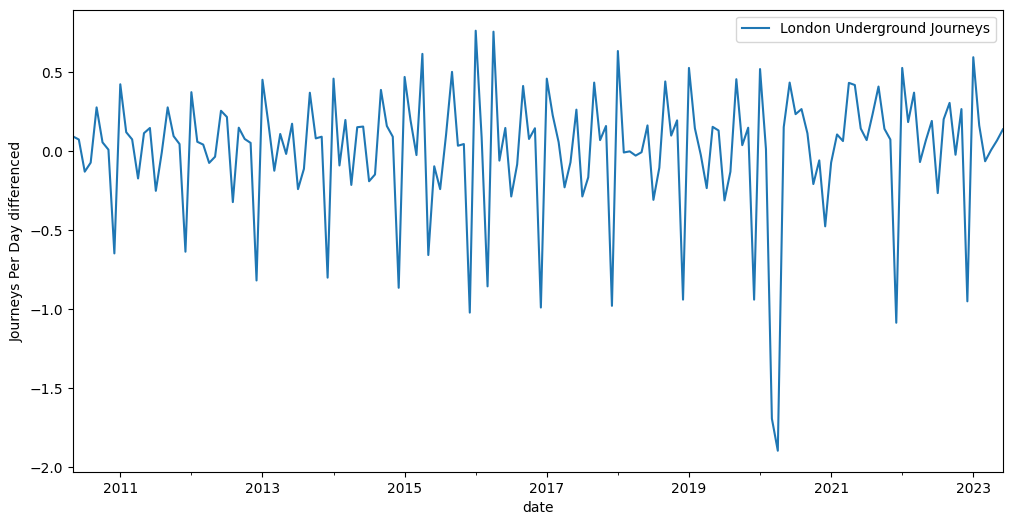

In [11]:
df_diff_M['PPD'].plot(figsize=(12,6),label='London Underground Journeys')
plt.ylabel('Journeys Per Day differenced')
plt.legend();

In [12]:
resultADF = adfuller(df_diff_M)
print('ADF Statistic: %f' % resultADF[0])
print('p-value: %f' % resultADF[1])
print('Critical Values:')
for key, value in resultADF[4].items():
	print( (key, value))

ADF Statistic: -3.170277
p-value: 0.021771
Critical Values:
('1%', -3.476273058920005)
('5%', -2.881687616548444)
('10%', -2.5775132580261593)


In [13]:
df_diff2_M = df_diff_M.diff()
df_diff2_M = df_diff2_M.iloc[1:]

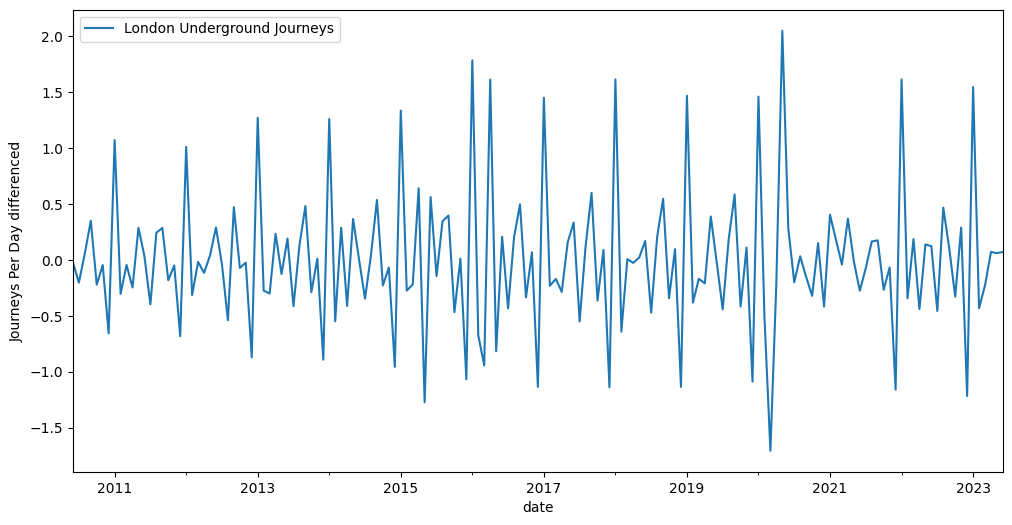

In [14]:
df_diff2_M['PPD'].plot(figsize=(12,6),label='London Underground Journeys')
plt.ylabel('Journeys Per Day differenced')
plt.legend();

In [15]:
resultADF = adfuller(df_diff2_M)
print('ADF Statistic: %f' % resultADF[0])
print('p-value: %f' % resultADF[1])
print('Critical Values:')
for key, value in resultADF[4].items():
	print( (key, value))

ADF Statistic: -5.629986
p-value: 0.000001
Critical Values:
('1%', -3.476273058920005)
('5%', -2.881687616548444)
('10%', -2.5775132580261593)


STL decomposition

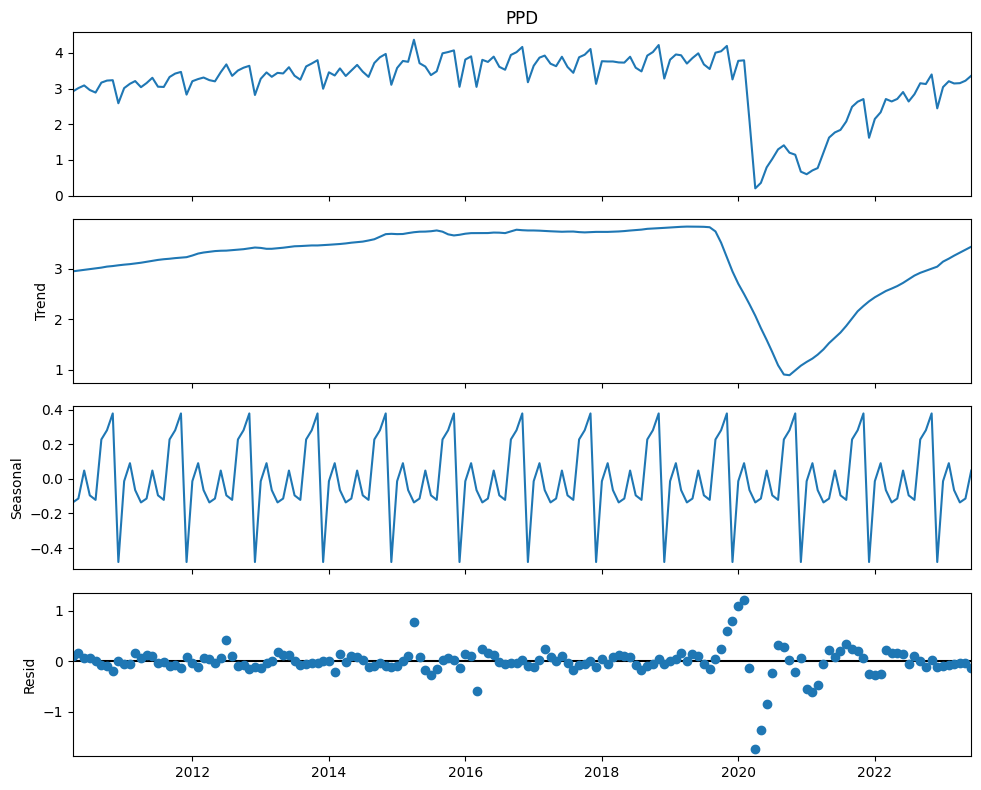

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rc('figure',figsize=(10,8))
resultSC = seasonal_decompose(df_M['PPD'], extrapolate_trend='freq', period=12)
seasonal_decomposition = resultSC.plot()

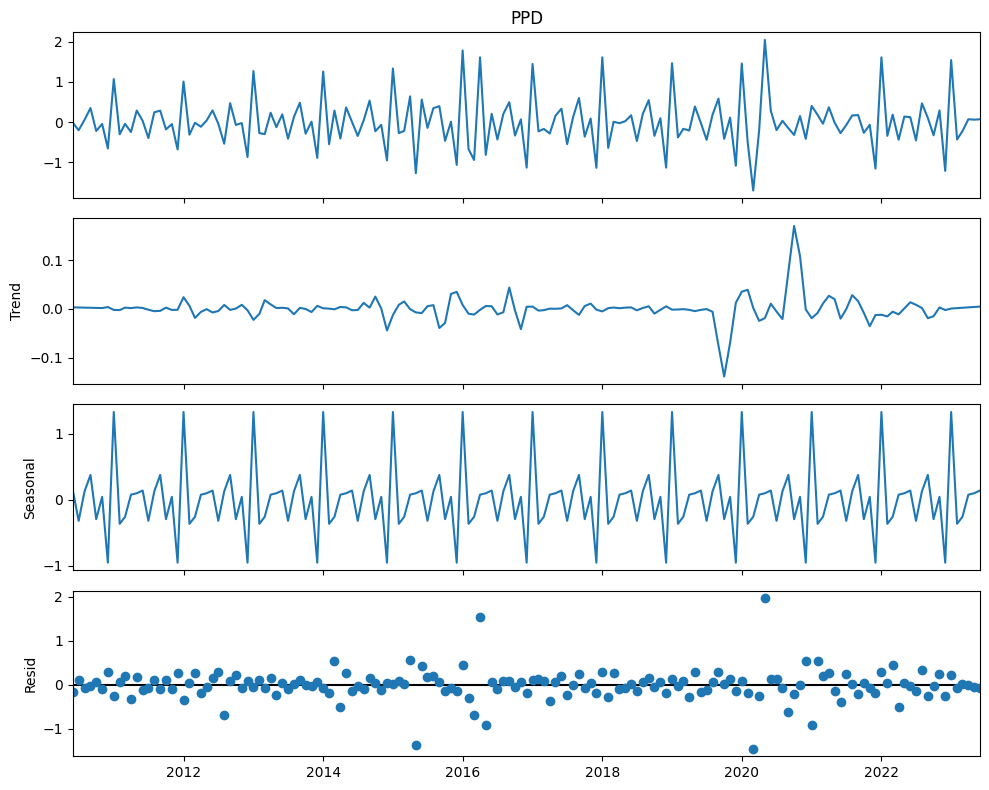

In [17]:
plt.rc('figure',figsize=(10,8))
resultSC = seasonal_decompose(df_diff2_M['PPD'], extrapolate_trend='freq', period=12)
seasonal_decomposition = resultSC.plot()

ACF and PACF

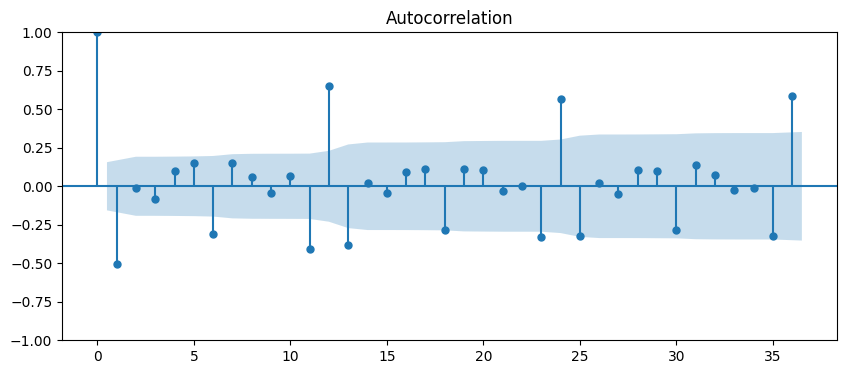

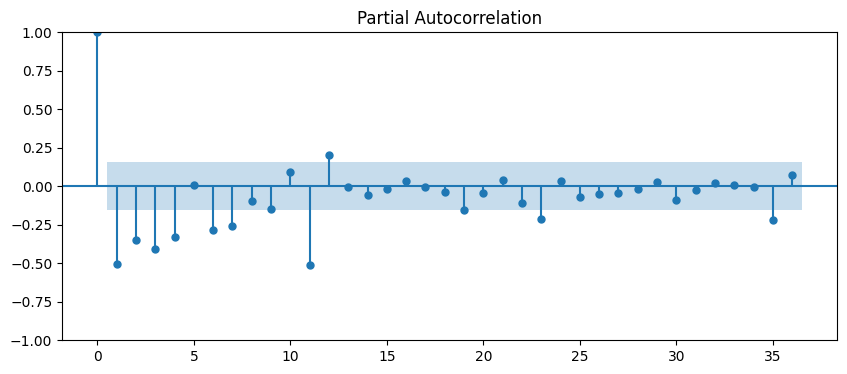

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rc('figure',figsize=(10,4))

plot_acf(df_diff2_M['PPD'], lags =36);
plot_pacf(df_diff2_M['PPD'], lags =36);

ARIMA

In [24]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(df_M['PPD'], order=(4,2,0))
results_arima = model_arima.fit()
results_arima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    PPD   No. Observations:                  159
Model:                 ARIMA(4, 2, 0)   Log Likelihood                 -93.877
Date:                Mon, 04 Sep 2023   AIC                            197.753
Time:                        22:13:05   BIC                            213.035
Sample:                    04-01-2010   HQIC                           203.960
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9470      0.063    -15.115      0.000      -1.070      -0.824
ar.L2         -0.8206      0.060    -13.791      0.000      -0.937      -0.704
ar.L3         -0.6620      0.057    -11.668      0.000      -0.773      -0.551
ar.L4         -0.3199      0.063     -5.042      0.000      -0.444      -0.196
sigma2         0.1917      0.016     11.730      0.000       0.160       0.224
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.08
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               4.13   Skew:                            -0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

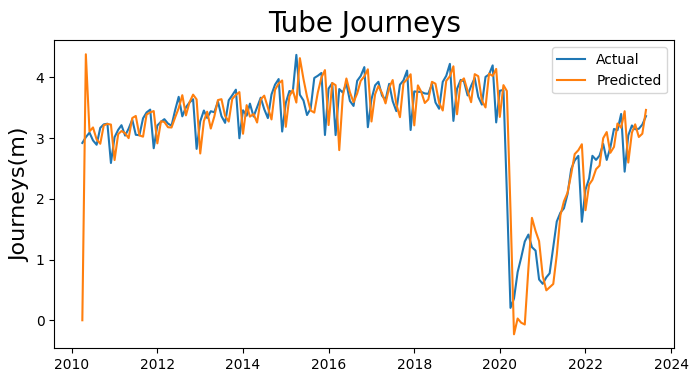

In [25]:
predictions_arima = results_arima.predict()
plt.figure(figsize=(8,4))
plt.plot(df_M['PPD'], label="Actual")
plt.plot(predictions_arima, label="Predicted")
plt.title('Tube Journeys', fontsize=20)
plt.ylabel('Journeys(m)', fontsize=16)
plt.legend()

In [21]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_M.index[-1]+ DateOffset(months=x)for x in range(0,48)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df=pd.concat([df_M,future_datest_df])
future_df.tail()

,PPD
2027-01-01,NaN
2027-02-01,NaN
2027-03-01,NaN
2027-04-01,NaN
2027-05-01,NaN


<Axes: >

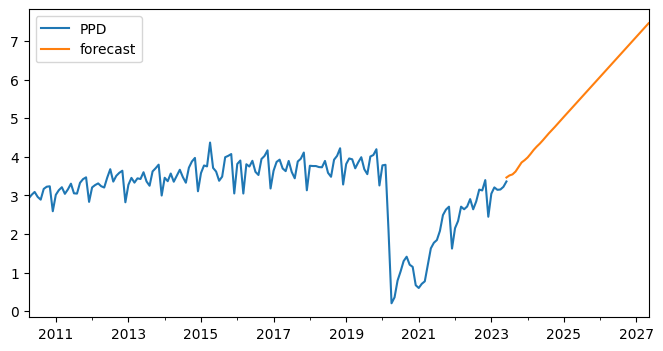

In [103]:
future_df['forecast'] = results_arima.predict(start = 158, end = 206, dynamic= True)
future_df[['PPD', 'forecast']].plot(figsize=(8, 4))

SARIMAX

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(df_M['PPD'],
                order=(4,2,0),
                seasonal_order=(1,1,1,12))
results_sarimax = sarima.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  PPD   No. Observations:                  159
Model:             SARIMAX(4, 2, 0)x(1, 1, [1], 12)   Log Likelihood                 -48.215
Date:                              Mon, 04 Sep 2023   AIC                            110.429
Time:                                      22:13:21   BIC                            131.267
Sample:                                  04-01-2010   HQIC                           118.896
                                       - 06-01-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5720      0.042    -13.584      0.000      -0.655      -0.490
ar.L2         -0.4994      0.052     -9.522      0.000      -0.602      -0.397
ar.L3         -0.3740      0.051     -7.299      0.000      -0.474      -0.274
ar.L4         -0.2616      0.088     -2.978      0.003      -0.434      -0.089
ar.S.L12       0.0641      0.096      0.667      0.504      -0.124       0.252
ma.S.L12      -0.9953      3.546     -0.281      0.779      -7.945       5.954
sigma2         0.0928      0.322      0.288      0.773      -0.538       0.724
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):               268.78
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               3.92   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

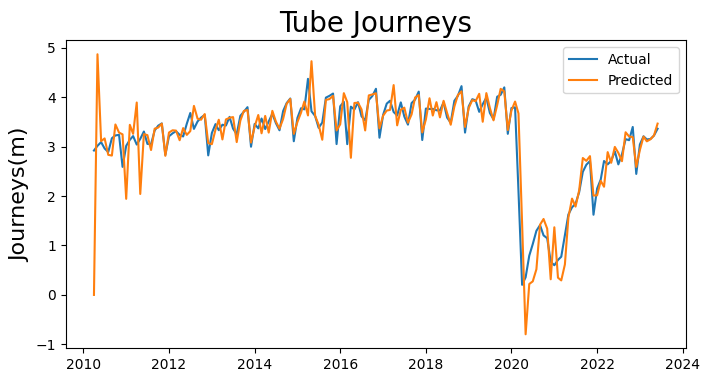

In [28]:
predictions_sarimax = results_sarimax.predict()
plt.figure(figsize=(8,4))
plt.plot(df_M['PPD'], label="Actual")
plt.plot(predictions_sarimax, label="Predicted")
plt.title('Tube Journeys', fontsize=20)
plt.ylabel('Journeys(m)', fontsize=16)
plt.legend()

<Axes: >

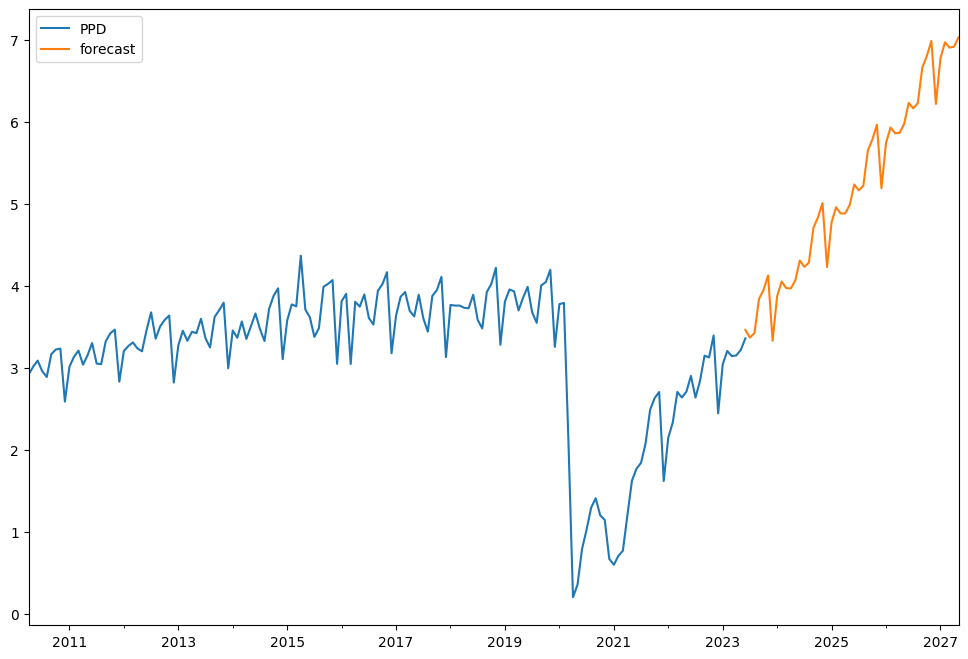

In [29]:
future_df['forecast'] = results_sarimax.predict(start = 158, end = 206, dynamic= True)
future_df[['PPD', 'forecast']].plot(figsize=(12, 8))

Auto-ARIMA

In [30]:
! pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.9 MB/s eta 0:00:00


In [31]:
from pmdarima.arima.auto import auto_arima

arima_model = auto_arima(df_M,
                         start_p=0,
                         d=1,
                         start_q=0,
                         max_p=3,
                         max_d=3,
                         max_q=3,
                         start_P=0,
                         D=1,
                         start_Q=0,
                         max_P=3,
                         max_D=3,
                         max_Q=3,
                         m=12,
                         seasonal=True,
                         error_action='warn',
                         trace=True,
                         suppress_warnings=True,
                         stepwise=True,
                         random_state=20,
                         n_fits=30)



Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=151.395, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=113.953, Time=0.36 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.41 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=144.749, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=95.429, Time=1.02 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=92.564, Time=2.90 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=16.21 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.36 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=94.664, Time=2.10 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=92.530, Time=3.59 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=95.193, Time=2.14 sec
 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=18.50 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.37 sec
 ARIMA(3,1,0)(3,1,0)[12]             : AIC=92.876, Time=1.54 sec
 ARIMA(2,1,1)(3,1,0)[12]             : AIC=93.205, Time=3

In [81]:
auto_arima = SARIMAX(df_M['PPD'],
                order=(2,1,0),
                seasonal_order=(3,1,0,12))
results_auto_arima = auto_arima.fit()
results_auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                PPD   No. Observations:                  159
Model:             SARIMAX(2, 1, 0)x(3, 1, 0, 12)   Log Likelihood                  24.841
Date:                            Mon, 04 Sep 2023   AIC                            -37.683
Time:                                    23:11:18   BIC                            -19.781
Sample:                                04-01-2010   HQIC                           -30.409
                                     - 06-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6744      0.049     13.802      0.000       0.579       0.770
ar.L2         -0.3335      0.064     -5.206      0.000      -0.459      -0.208
ar.S.L12      -0.7248      0.049    -14.850      0.000      -0.821      -0.629
ar.S.L24      -0.5671      0.085     -6.643      0.000      -0.734      -0.400
ar.S.L36      -0.3336      0.094     -3.543      0.000      -0.518      -0.149
sigma2         0.0387      0.003     14.316      0.000       0.033       0.044
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               550.38
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               6.59   Skew:                            -1.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

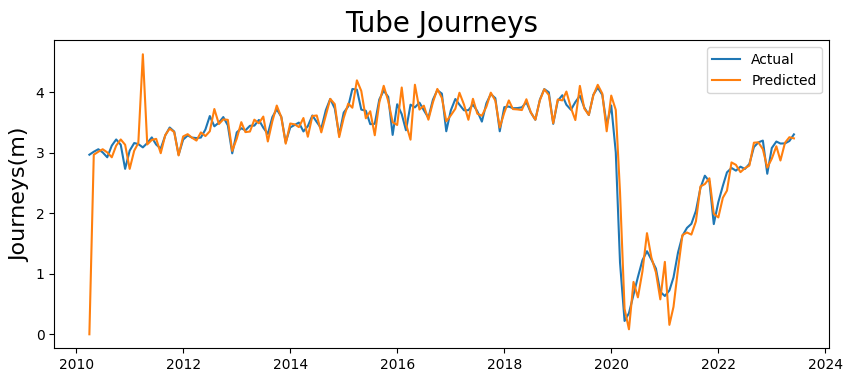

In [85]:
predictions_auto_arima = results_auto_arima.predict()
plt.figure(figsize=(10,4))
plt.plot(df_M['PPD'], label="Actual")
plt.plot(predictions_auto_arima, label="Predicted")
plt.title('Tube Journeys', fontsize=20)
plt.ylabel('Journeys(m)', fontsize=16)
plt.legend()

<Axes: >

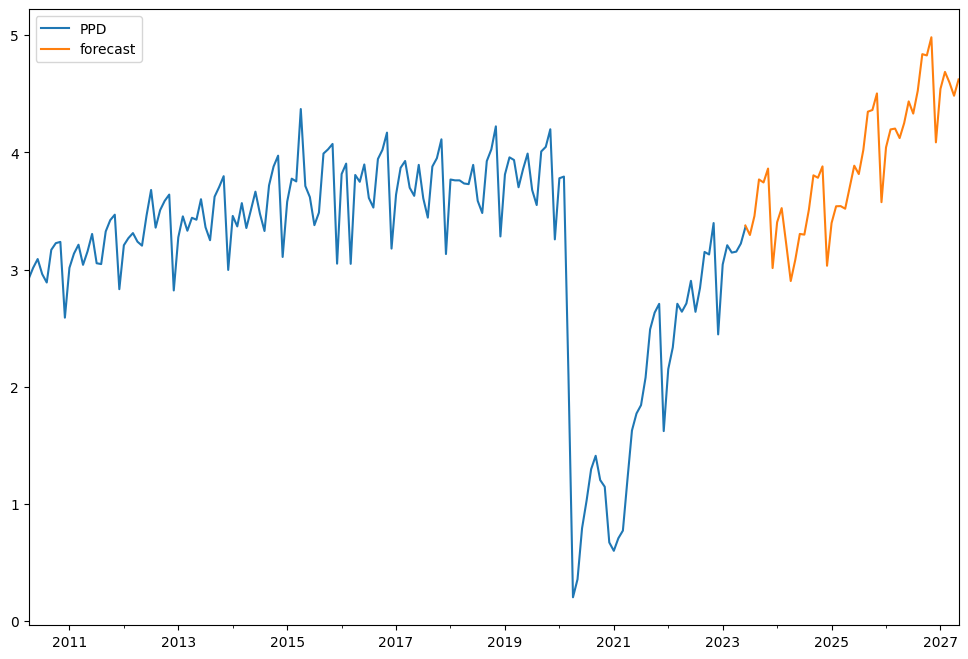

In [63]:
future_df['forecast'] = results_auto_arima.predict(start = 158, end = 206, dynamic= True)
future_df[['PPD', 'forecast']].plot(figsize=(12, 8))

Prophet

In [41]:
from prophet import Prophet

In [57]:
df_M_index = df_M.reset_index()
df_M_index.columns = ['ds', 'y']
df_M_index.tail()

,ds,y
154,2023-02-01,3.207143
155,2023-03-01,3.144444
156,2023-04-01,3.152586
157,2023-05-01,3.221429
158,2023-06-01,3.360714


In [45]:
prophet = Prophet()
prophet.fit(df_M_index)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt3faz7i5/98uhd99o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt3faz7i5/3j2cs4_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45536', 'data', 'file=/tmp/tmpt3faz7i5/98uhd99o.json', 'init=/tmp/tmpt3faz7i5/3j2cs4_z.json', 'output', 'file=/tmp/tmpt3faz7i5/prophet_model1f2gyxh8/prophet_model-20230904222931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:29:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:29:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


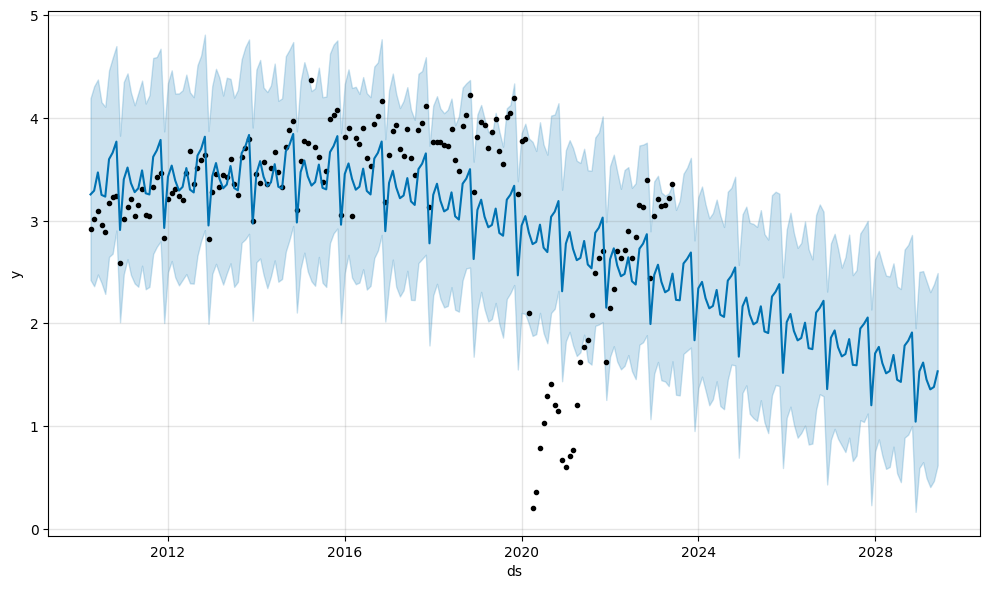

In [76]:
future = prophet.make_future_dataframe(periods=72, freq = 'M')
forecast = prophet.predict(future)
prophet_plot=prophet.plot(forecast)

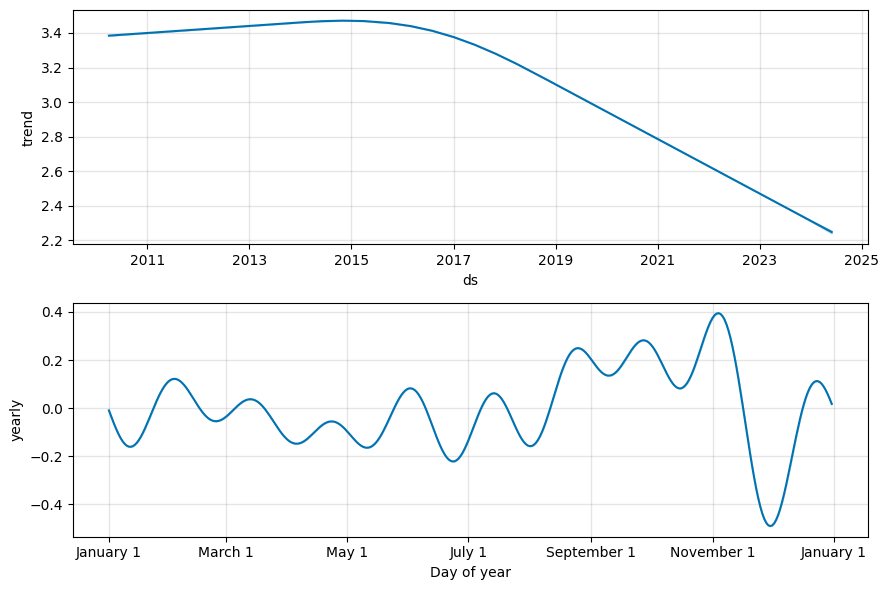

In [56]:
prophet_component_plot = prophet.plot_components(forecast)

Conclusion

In [105]:
far_future_dates=[df_M.index[-1]+ DateOffset(months=x)for x in range(0,72)]
far_future_datest_df=pd.DataFrame(index=far_future_dates[1:],columns=df.columns)
far_future_df=pd.concat([df_M,far_future_datest_df])
far_future_df.tail()

,PPD
2029-01-01,NaN
2029-02-01,NaN
2029-03-01,NaN
2029-04-01,NaN
2029-05-01,NaN


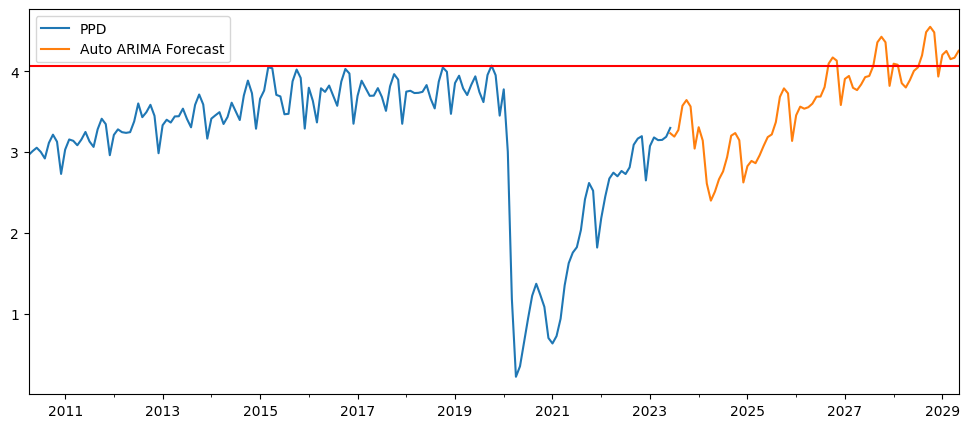

In [112]:
far_future_df['Auto ARIMA Forecast'] = results_auto_arima.predict(start = 158, end = 500, dynamic= True)
far_future_df[['PPD', 'Auto ARIMA Forecast']].plot(figsize=(12, 5))
plt.axhline(far_future_df['PPD'].max(), color='r',label ='Max PPD')
plt.show()